In [20]:
pip install nltk

In [21]:
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[

In [22]:
# Loading the data

df = pd.read_csv('csv_order\Beyonce.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\rajro\AppData\Local\Temp\ipykernel_33140\2278571803.py:3: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('csv_order\Beyonce.csv')


,Artist,Title,Album,Date,Lyric,Year
0,Beyoncé,Drunk in Love,BEYONCÉ,2013-12-17,beyoncé i've been drinkin' i've been drinkin' ...,2013.0
1,Beyoncé,Formation,Lemonade,2016-02-06,messy mya what happened at the new wil'ins bit...,2016.0
2,Beyoncé,Partition,BEYONCÉ,2013-12-13,part yoncé let me hear you say hey ms carte...,2013.0
3,Beyoncé,Mine,BEYONCÉ,2013-12-13,beyoncé i've been watching for the signs took ...,2013.0
4,Beyoncé,Hold Up,Lemonade,2016-04-23,hold up they don't love you like i love you sl...,2016.0


**Data Cleaning**

In [23]:
# Removing irrelevant columns
df.drop(['Artist', 'Year', 'Date'], axis=1, inplace = True)
df.head()

,Title,Album,Lyric
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   406 non-null    object
 1   Album   406 non-null    object
 2   Lyric   406 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [25]:
# Since there are NaN in Lyric column, casting the column type as string
# Then NaN will be removed later

df = df.astype({'Lyric':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   406 non-null    object
 1   Album   406 non-null    object
 2   Lyric   406 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [26]:
df.shape

(406, 3)

In [27]:
# As can be seen in the df, there are artist names in the Lyric
# Listing the possible names mentioned here

name_list = [
'beyoncé', 'bey', 'yoncé', 'queen b', 'queen bey', 'mrs carter', 'sasha fierce',
'b', 'king b', 'third ward trill', 'creole', 'texas bama',
'jay z', 'blue ivy', 'rumi', 'sir', 'solange', 'tina knowles', 'mathew knowles',
'destiny\'s child', 'kelly rowland', 'michelle williams',
'megan thee stallion', 'kendrick lamar', 'madonna', 'grace jones', 'chimamanda ngozi adichie',
'drake', 'frank ocean', 'the weeknd', 'nicki minaj', 'j balvin', 'shatta wale',
'major lazer', 'ed sheeran', 'eminem', 'lady gaga', 'sia', 'dixie chicks',
'jack white', 'andré 3000', 'sean paul', 'slim thug', 'pharrell williams',
'luther vandross', 'etta james', 'nina simone', 'tina turner', 'diana ross',
'michael jackson', 'prince', 'betty davis', 'meshell ndegeocello'
]
names = '|'.join(name_list)

df[df['Lyric'].str.contains(names)]

,Title,Album,Lyric
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...
...,...,...,...
401,Smash Into You (Lost Daze Remix),Heat - EP,head down as i watch my feet take turns hittin...
402,Black Parade (Remix),Unknown,being black maybe that the reason why they alw...
403,This Love,Unknown,lyrics for this song have yet to be released p...
404,At Last (Karmatronic Remix),Heat - EP,at last my love has come along my lonely days ...


In [28]:
# Function to clean lyrics

def cleaning_lyrics(lyric):
    if lyric != "nan":
        for name in name_list:
            lyric = lyric.replace(name, '').strip()
            lyric = lyric.lower()
    else:
        lyric = lyric.replace("nan", '').strip()
    return lyric

# Apply the function to the 'Lyric' column

df['Cleaned Lyric'] = df['Lyric'].apply(cleaning_lyrics)
df

,Title,Album,Lyric,Cleaned Lyric
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...,i've een drinkin' i've een drinkin' i get filt...
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...,messy mya what happened at the new wil'ins itc...
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...,part let me hear you say hey ms carter hey...
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...,i've een watching for the signs took a trip to...
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...,hold up they don't love you like i love you sl...
...,...,...,...,...
401,Smash Into You (Lost Daze Remix),Heat - EP,head down as i watch my feet take turns hittin...,head down as i watch my feet take turns hittin...
402,Black Parade (Remix),Unknown,being black maybe that the reason why they alw...,eing lack maye that the reason why they always...
403,This Love,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to e released pl...
404,At Last (Karmatronic Remix),Heat - EP,at last my love has come along my lonely days ...,at last my love has come along my lonely days ...


In [29]:
# Generating Wordcloud

STOPWORDS = STOPWORDS

wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        height=2000,
        width=2000,
        max_words=200, 
        min_font_size=10, 
        relative_scaling=0.5
)

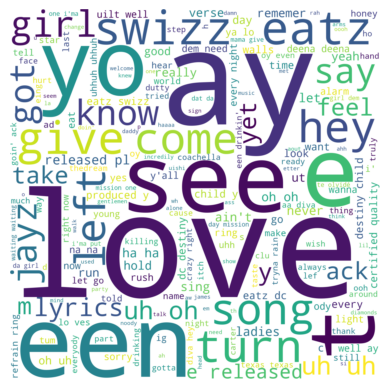

In [30]:
wc.generate(df['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Analysis using TextBlob**

In [31]:
# Removing stopwords and tokenizing cleaned lyrics for sentiment analysis

def tokenizing(lyrics):
    tokens = word_tokenize(lyrics)
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

df['Tokenized Lyric'] = df['Cleaned Lyric'].apply(tokenizing)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...,i've een drinkin' i've een drinkin' i get filt...,'ve een drinkin ' 've een drinkin ' get filthy...
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...,messy mya what happened at the new wil'ins itc...,messy mya happened new wil'ins itch 'm ack pop...
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...,part let me hear you say hey ms carter hey...,part let hear say hey ms carter hey ms carter ...
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...,i've een watching for the signs took a trip to...,'ve een watching signs took trip clear mind oh...
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...,hold up they don't love you like i love you sl...,hold n't love like love slow n't love like lov...
...,...,...,...,...,...
401,Smash Into You (Lost Daze Remix),Heat - EP,head down as i watch my feet take turns hittin...,head down as i watch my feet take turns hittin...,head watch feet take turns hitting ground eyes...
402,Black Parade (Remix),Unknown,being black maybe that the reason why they alw...,eing lack maye that the reason why they always...,eing lack maye reason always mad
403,This Love,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to e released pl...,lyrics song yet e released please check ack so...
404,At Last (Karmatronic Remix),Heat - EP,at last my love has come along my lonely days ...,at last my love has come along my lonely days ...,last love come along lonely days life like son...


In [32]:
# Sentiment analysis using VADER

sia = SentimentIntensityAnalyzer()

In [33]:
def sentiment(tokenized):
    sentiment_score = sia.polarity_scores(tokenized)
    
    return sentiment_score

df['Sentiment Score'] = df['Tokenized Lyric'].apply(sentiment)

df[['Neg', 'Neu', 'Pos', 'Compound']] = df['Sentiment Score'].apply(pd.Series)

df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...,i've een drinkin' i've een drinkin' i get filt...,'ve een drinkin ' 've een drinkin ' get filthy...,"{'neg': 0.122, 'neu': 0.609, 'pos': 0.269, 'co...",0.122,0.609,0.269,0.9966
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...,messy mya what happened at the new wil'ins itc...,messy mya happened new wil'ins itch 'm ack pop...,"{'neg': 0.145, 'neu': 0.609, 'pos': 0.246, 'co...",0.145,0.609,0.246,0.9891
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...,part let me hear you say hey ms carter hey...,part let hear say hey ms carter hey ms carter ...,"{'neg': 0.064, 'neu': 0.678, 'pos': 0.258, 'co...",0.064,0.678,0.258,0.9980
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...,i've een watching for the signs took a trip to...,'ve een watching signs took trip clear mind oh...,"{'neg': 0.067, 'neu': 0.756, 'pos': 0.177, 'co...",0.067,0.756,0.177,0.9957
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...,hold up they don't love you like i love you sl...,hold n't love like love slow n't love like lov...,"{'neg': 0.531, 'neu': 0.38, 'pos': 0.089, 'com...",0.531,0.380,0.089,-0.9997
...,...,...,...,...,...,...,...,...,...,...
401,Smash Into You (Lost Daze Remix),Heat - EP,head down as i watch my feet take turns hittin...,head down as i watch my feet take turns hittin...,head watch feet take turns hitting ground eyes...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.000,0.737,0.263,0.9916
402,Black Parade (Remix),Unknown,being black maybe that the reason why they alw...,eing lack maye that the reason why they always...,eing lack maye reason always mad,"{'neg': 0.579, 'neu': 0.421, 'pos': 0.0, 'comp...",0.579,0.421,0.000,-0.6705
403,This Love,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to e released pl...,lyrics song yet e released please check ack so...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.000,0.796,0.204,0.3182
404,At Last (Karmatronic Remix),Heat - EP,at last my love has come along my lonely days ...,at last my love has come along my lonely days ...,last love come along lonely days life like son...,"{'neg': 0.039, 'neu': 0.484, 'pos': 0.477, 'co...",0.039,0.484,0.477,0.9753


In [34]:
# Categorize the sentiment as Positive, Neutral, and Negative

def categorize(x):
    if x > 0:
        return "Positive"
    if x < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound,Sentiment
0,Drunk in Love,BEYONCÉ,beyoncé i've been drinkin' i've been drinkin' ...,i've een drinkin' i've een drinkin' i get filt...,'ve een drinkin ' 've een drinkin ' get filthy...,"{'neg': 0.122, 'neu': 0.609, 'pos': 0.269, 'co...",0.122,0.609,0.269,0.9966,Positive
1,Formation,Lemonade,messy mya what happened at the new wil'ins bit...,messy mya what happened at the new wil'ins itc...,messy mya happened new wil'ins itch 'm ack pop...,"{'neg': 0.145, 'neu': 0.609, 'pos': 0.246, 'co...",0.145,0.609,0.246,0.9891,Positive
2,Partition,BEYONCÉ,part yoncé let me hear you say hey ms carte...,part let me hear you say hey ms carter hey...,part let hear say hey ms carter hey ms carter ...,"{'neg': 0.064, 'neu': 0.678, 'pos': 0.258, 'co...",0.064,0.678,0.258,0.9980,Positive
3,Mine,BEYONCÉ,beyoncé i've been watching for the signs took ...,i've een watching for the signs took a trip to...,'ve een watching signs took trip clear mind oh...,"{'neg': 0.067, 'neu': 0.756, 'pos': 0.177, 'co...",0.067,0.756,0.177,0.9957,Positive
4,Hold Up,Lemonade,hold up they don't love you like i love you sl...,hold up they don't love you like i love you sl...,hold n't love like love slow n't love like lov...,"{'neg': 0.531, 'neu': 0.38, 'pos': 0.089, 'com...",0.531,0.380,0.089,-0.9997,Negative
...,...,...,...,...,...,...,...,...,...,...,...
401,Smash Into You (Lost Daze Remix),Heat - EP,head down as i watch my feet take turns hittin...,head down as i watch my feet take turns hittin...,head watch feet take turns hitting ground eyes...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.000,0.737,0.263,0.9916,Positive
402,Black Parade (Remix),Unknown,being black maybe that the reason why they alw...,eing lack maye that the reason why they always...,eing lack maye reason always mad,"{'neg': 0.579, 'neu': 0.421, 'pos': 0.0, 'comp...",0.579,0.421,0.000,-0.6705,Negative
403,This Love,Unknown,lyrics for this song have yet to be released p...,lyrics for this song have yet to e released pl...,lyrics song yet e released please check ack so...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.000,0.796,0.204,0.3182,Positive
404,At Last (Karmatronic Remix),Heat - EP,at last my love has come along my lonely days ...,at last my love has come along my lonely days ...,last love come along lonely days life like son...,"{'neg': 0.039, 'neu': 0.484, 'pos': 0.477, 'co...",0.039,0.484,0.477,0.9753,Positive


**Visualizing the Sentiment**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

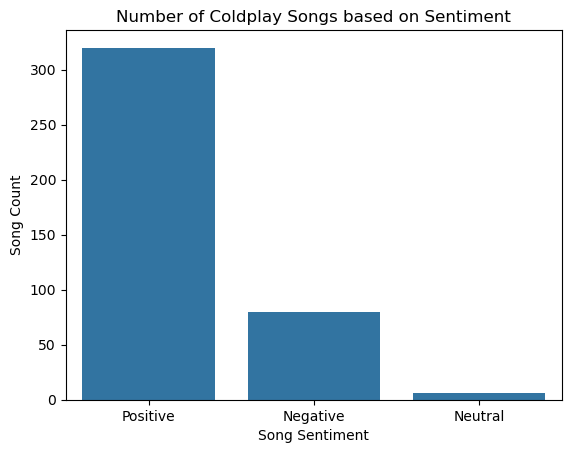

In [36]:
sns.countplot(x=df['Sentiment'], data=df).set(title='Number of Coldplay Songs based on Sentiment')
plt.xlabel('Song Sentiment')
plt.ylabel('Song Count')
plt.show()

**How's the sentiment in each album?**

In [37]:
album_sentiment = df.groupby('Album')['Compound'].mean().reset_index().sort_values(by='Compound', ascending = False).reset_index(drop=True)
album_sentiment.head()

,Album,Compound
0,So Amazing: An All-Star Tribute to Luther Vand...,0.99920
1,Above and Beyond,0.99740
2,4: The Remix - EP,0.99625
3,Twinsmatic Remix,0.99610
4,Austin Powers In Goldmember (Music from the Mo...,0.98720


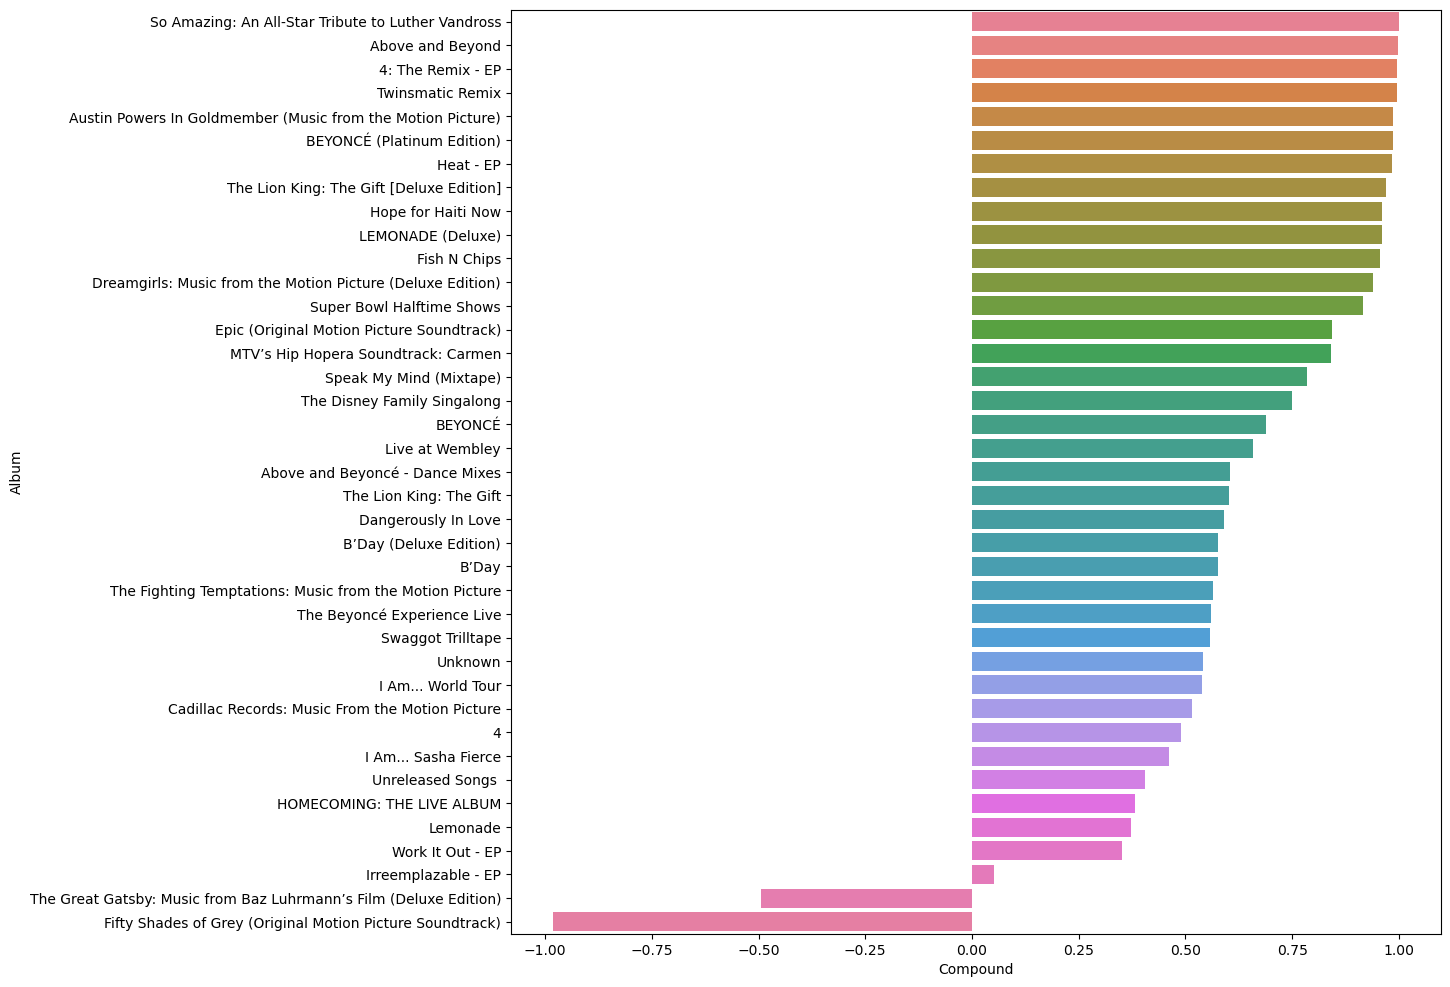

In [38]:
plt.figure(figsize =(12,12))
sns.barplot(x='Compound', y='Album', data = album_sentiment, hue='Album')
plt.show()

**Which songs has the most positive and most negative sentiment?**

In [39]:
pos_song = df[df['Compound'] == df['Compound'].max()]
neg_song = df[df['Compound'] == df['Compound'].min()]

print(f"The most positive song is {pos_song['Title'].to_string(index=False)} with a sentiment value of {pos_song['Compound'].to_string(index=False)}")
print(f"The most negative song is {neg_song['Title'].to_string(index=False)} with a sentiment value of {neg_song['Compound'].to_string(index=False)} ")

The most positive song is Love on Top (DJ Escape & Tony Coluccio Remix) with a sentiment value of 0.9999
The most negative song is                   Hold Up
   Lemonade Film (Script)
HOLD UP (Italian Version) with a sentiment value of -0.9997
-0.9997
-0.9997 


In [40]:
pd.set_option('display.max_colwidth', None)

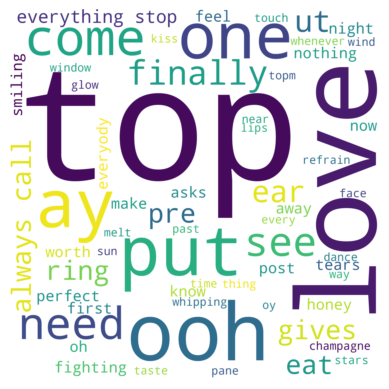

In [41]:
# Wordcloud of the most positive song

wc.generate(pos_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

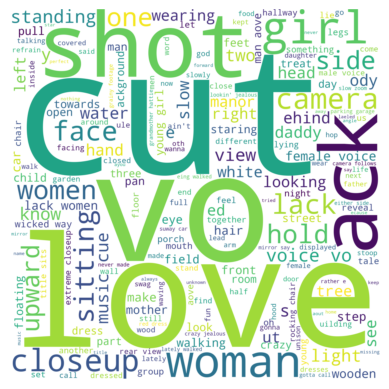

In [42]:
# Wordcloud of the most negative song

wc.generate(neg_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

From this analysis, here are some key takeaways:
1. The most common words in Beyonce songs are "love", "see", "ay" and "een"
2. Majority of Beyonce songs has positive sentiment, which might be correlated to how their songs are perceived as happy and uplifting
3. "So Amazing: An All Star Tribute to Lurther Vandross" appears to be the most positive albums and "Fifty Shades of Gray(Orignal Motion Picture Soundtrack)" is the most negative one
3. The most positive song is "Love on Top (DJ Escape & Tony Coluccio Remix)" and words like "love", "top", "ooh", and "put" are most spoken. 
4. On the other hand, "Hold Up","Lemonade Film (Script)" is the most negative song in this database, which is manifested in the title itself. Words like "love", "cut", "vo" and "shot" are the most common one